In [35]:
%matplotlib inline
import importlib as imp
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
#rcParams["patch.force_edgecolor"] = True

import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
imp.reload(CalcABA);
import plotting_ABA_Diewertje_deltaABA as pltABA
imp.reload(pltABA);
import plotting_Boyle_Diewertje as plt_B
imp.reload(plt_B);

import sys 
sys.path.append('../code_general/')
import CRISPR_free_energy_landscape_Diewertje as FreeEnergy
imp.reload(FreeEnergy);
import read_model_ID;
imp.reload(read_model_ID);

import sys 
sys.path.append('../code_general_Finkelsteinlab/')
import plotting_Finkelsteinlab as plt_F
imp.reload(plt_F)


import analysis_SA_fits_Diewertje as SAfits
imp.reload(SAfits);



In [36]:
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,16):
    sa = pd.read_csv('../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = '../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 = simset3[np.argmin(chi_squared)]
sim4='../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_4.txt'
sim2='../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_2.txt'

best_fit_conc3

'../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_6.txt'

In [3]:
print('The chi-squared of the best fit is:',chi_squared[5])

The chi-squared of the best fit is: 2261.99921348


In [4]:
chi_squared

[2975.52893341,
 2603.88767228,
 2681.00263883,
 3505.44968525,
 2847.32490735,
 2261.99921348,
 4549.69331715,
 7536.96814718,
 2855.97726885,
 5193.50316211,
 4753.10758053,
 2515.08247668,
 4609.60292909,
 2691.53778309,
 14613.856755399998]

In [37]:
# Load data
import Prepare_data as Pre
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')
rawABA

cas9=pd.read_csv('../Data_ABA_Finkelsteinlab/cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')
x,_,_=Pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')

# prepare data
path_to_data= '../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename= 'cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv'
xdata,ydata,yerr=Pre.Prepare_Cdata(path_to_data,filename) 


In [38]:
# Load Parameters to calculate the chi-squared for best fit
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)

In [7]:
# --- make selection --- 
selected_sims_chi=np.array(simset3)[(np.array(chi_squared)<3000)]

simset3 = selected_sims_chi 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,44,'general_energies_no_kPR')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]

PAM    3.500000
1     -6.471187
2      0.381443
3      4.351149
4     -0.700249
5      2.012393
6      0.571043
7     -4.828597
8      5.019860
9     -0.350366
10    -4.078553
11    -1.307741
12     4.912711
13     1.710544
14     1.780524
15    -6.026723
16     3.657865
17     2.060678
18     0.718515
19     1.349741
20     0.831253
Name: ../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_6.txt, dtype: float64

In [7]:
percentage=0.1,
model_id='general_energies_no_kPR'
path=path_to_data
replica='cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv'

import os
import numpy as np
import pandas as pd
import Boyle_data_processing as process
import CRISPR_dCas9_binding_curve_Boyle as dCas9
import matplotlib.pylab as plt
import Prepare_data as prep

import Calculate_ABA_Finkelsteinlab_Diewertje as ABA


# BASED ON ABA AVARAGE DATA AND PREDICTED ABA

def Weighted_average(row):
    y = np.array(row['ydata'])
    e = np.array(row['yerr'])
    wa=np.average(y, weights=e ** -2, axis=0)
    return wa


def calc_Weighted_average(path='../Data_Boyle/', replica='1', outputdirectory='../Data_Boyle/Weighted_Avarage/',
                          save=True):
    # For me replica is the filename
    xdata, ydata, yerr = prep.Prepare_Cdata(path=path,filename=replica)
    data = pd.DataFrame(columns=['xdata', 'ydata', 'yerr'])
    data['xdata'] = xdata
    data['ydata'] = ydata
    data['yerr'] = yerr
    wa = []
    for i in data.index:
        wa.append(Weighted_average(data.loc[i]))
    #data['WA'] = wa
    #data['WA'] = data.apply(Weighted_average, axis=1)

    WA = pd.DataFrame(columns=['MM_pos', 'WA_data'])
    WA.MM_pos = xdata
    WA.WA_data = wa
    return WA


def predict_train(parameters, model_id='general_energies_no_kPR', path='../Data_Boyle/', replica='1', Plot=True):
    wa = calc_Weighted_average(path=path, replica=replica, save=False)
    prediction=wa.copy()
    concentrations=np.array([0.1,0.3,1.,3.,10.,30.,100.,300.])
    reference=1
    prediction['WA_model']=wa['MM_pos'].apply(lambda x: ABA.calc_ABA(parameters,concentrations,reference,x.tolist(),model_id,guide_length=20,T=10*60))
    score = prediction.dropna().apply(lambda x: np.abs(x['WA_data'] - x['WA_model']) / x['WA_data'], axis=1).mean()
    corr=0
    return score, corr, prediction


WA=calc_Weighted_average(path,replica,save=False)
WA['WA_data_delta']=WA['WA_data']#-2.5545002878227865 
# substract ontarget to go to delta ABA


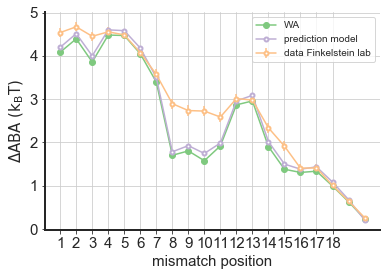

In [8]:
WAsingle=[]
singlePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==1):
        singlePos.append(WA['MM_pos'][i])
        WAsingle.append(WA['WA_data_delta'][i])

T=60*10
guide_length=20
model_id = 'general_energies_no_kPR'
        
WAsingle_ordered=np.empty(len(WAsingle)+1)
for i in range(1,len(WAsingle)+1):
    WAsingle_ordered[singlePos[i-1]]=WAsingle[i-1]
len(WAsingle_ordered)
plt.figure()
plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA')
delta1 = pltABA.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
plt.legend()
plt.grid()

# THIS IS CALCULATED WITH 9 POINTS!!

Text(0.5, 1.0, 'Prediction (top) / WA (bottom)')

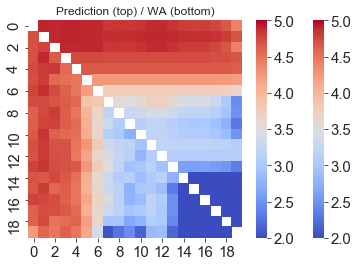

In [9]:
#-----For double mismatches-----
WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

import seaborn as sns
plt.figure()
best_heatmap = pltABA.predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=True, vmin=2,vmax=5)
plt.title('Prediction (top) / WA (bottom)')

# THIS IS CALCULATED WITH 9 POINTS!!

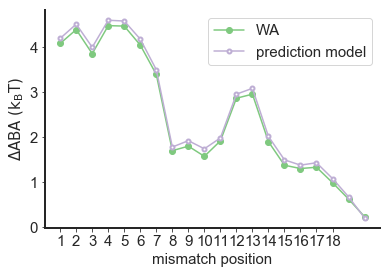

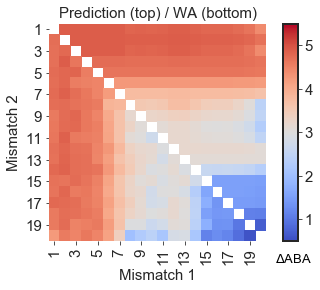

In [39]:
import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'general_energies_no_kPR'

# plt.figure()
# _ = pltABA.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)


# plt.figure()
# best_heatmap = pltABA.predict_double_mm_delta(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

def predict_single_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    #concentrations=np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA = np.zeros(guide_length)
    for mm_pos in range(1, guide_length + 1):
        delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                       mismatch_positions=[mm_pos],
                                                       model_id=model_id,
                                                       guide_length=guide_length,
                                                       T=T,
                                                       ontarget_ABA=ontarget_ABA)

    if show_plot:
        ax = plt.plot(range(1, guide_length + 1),
                      delta_ABA,
                      marker='o',
                      markersize=4,
                      markerfacecolor='white',
                      markeredgewidth=2,
                      linestyle='solid',
                      label='prediction model')

        sns.despine()
        plt.xticks(range(1, 19), fontsize=15);
        plt.yticks(fontsize=15);
        plt.xlabel('mismatch position', fontsize=15);
        plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            single_mut_data_mean = plot_single_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)

            plt.errorbar(x=single_mut_data_mean['Position'],
                         y=single_mut_data_mean['Delta ABA (kBT)'],
                         yerr=single_mut_data_mean['Uncertainty'],
                         marker='o',
                         markersize=4,
                         markerfacecolor='white',
                         markeredgewidth=2,
                         linestyle='solid',
                         label='data Finkelstein lab')
            plt.legend(fontsize=15, loc='best')
    return delta_ABA

def predict_double_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    #concentrations=np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_delta_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T,
                                                                                ontarget_ABA=ontarget_ABA)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=0.5, vmax=5.5, square=True, cbar=False)
        cbar = axHeatmap.figure.colorbar(axHeatmap.axes.collections[0],aspect=15,drawedges=False);
        cbar.set_label(r'$\Delta$ABA',rotation=0, labelpad=-20,fontsize=13,y=-0.05,color='black')
        plt.grid()
        ax = plt.gca()
        #ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        #ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction (top)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='ABA', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA')
_ = predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
plt.legend()

WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

import seaborn as sns
plt.figure()
best_heatmap = predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=False, vmin=0.5,vmax=5.5)
plt.title('Prediction (top) / WA (bottom)',fontsize=15)
plt.xlabel('Mismatch 1', fontsize=15)
plt.ylabel('Mismatch 2', fontsize=15)
ax = plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), ax.get_yticks() + 0.5)), fontsize=15, rotation=0);


Text(0.5, 1.0, 'Prediction (top) / WA (bottom)')

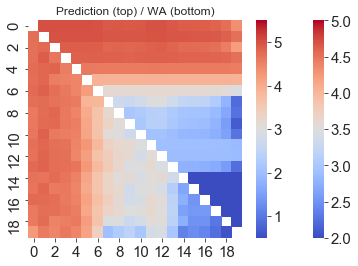

In [12]:
plt.figure()
Param=getParm.load_simm_anneal(selected_sims_chi[0],Nparams)
best_heatmap = pltABA.predict_double_mm(Param,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=True, vmin=0.5,vmax=5.5)
plt.title('Prediction (top) / WA (bottom)')

# All look good!

In [13]:
selected_sims_chi

array(['../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_1.txt',
       '../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_2.txt',
       '../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_3.txt',
       '../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_5.txt',
       '../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_6.txt',
       '../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_9.txt',
       '../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_12.txt',
       '../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_14.txt'],
      dtype='<U77')

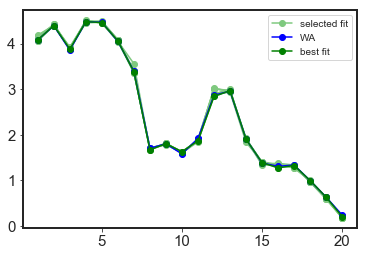

In [19]:
# plot it for all the selected fits with 3 concentration points
epsPAM=[]

for sim in selected_sims_chi:
    concentrations=np.array([1,30,100])
    Param=getParm.load_simm_anneal(sim,Nparams)
    deltaABA = predict_single_mm(Param,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)
    plt.plot(range(1,21),deltaABA,marker='o',color=sns.color_palette()[0])
    epsPAM.append(Param[0])
    
plt.plot(range(1,21),deltaABA,marker='o',label='selected fit',color=sns.color_palette()[0])
deltaABA = predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)
plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA',color='blue')
plt.plot(range(1,21),deltaABA,marker='o',label='best fit',color='green')

plt.legend()



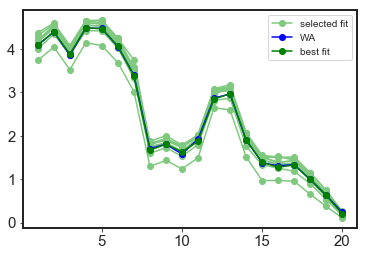

In [15]:
# plot it for all the selected fits with 9 concentration points

for sim in selected_sims_chi:
    Param=getParm.load_simm_anneal(sim,Nparams)
    deltaABA = pltABA.predict_single_mm(Param,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)
    plt.plot(range(1,21),deltaABA,marker='o',color=sns.color_palette()[0])
    
plt.plot(range(1,21),deltaABA,marker='o',label='selected fit',color=sns.color_palette()[0])
deltaABA = predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)
plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA',color='blue')
plt.plot(range(1,21),deltaABA,marker='o',label='best fit',color='green')

plt.legend()



In [16]:
concentrations=np.array([1,30,100])
#concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
reference_conc = 1 #10

ontarget_ABA = CalcABA.calc_ABA(Param_conc3, concentrations, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
ontarget_ABA


0.14932686290135375

In [44]:
concentrations=np.array([1,30,100])
#concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
reference_conc = 1 #10
ontarget_ABA=[]
for sim in simset3: 
    Param=getParm.load_simm_anneal(sim,Nparams)
    ontarget_ABA.append(CalcABA.calc_ABA(Param, concentrations, reference=1,
                                        mismatch_positions=[],
                                        model_id=model_id,
                                        guide_length=20,
                                        T=60 * 10))
ontarget_ABA


[-0.5842791666714473,
 5.1828922761656155,
 4.7345627944446,
 0.5709165503844428,
 0.14932686290135375,
 -1.3451266889420261,
 0.08268568565052821,
 -0.18207574953125985]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


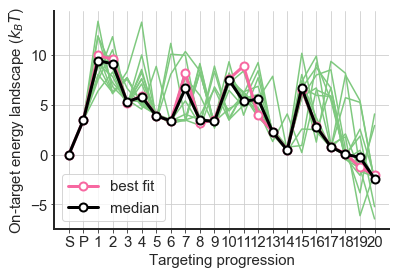

In [76]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3: #selected_sims_chi:
    print(type(filename))
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    #plt.figure()
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

# plot best fit eq in this fit
# fit_eq=getParm.load_simm_anneal('../Diewertje/26_5_2019_cas12_conc3_eq/fit_26_5_2019_cas12_conc3_eq_sim_5.txt',44)
# Energy_landscape_eq, FreeEnergy_landscape_eq = FreeEnergy.plot_free_energy_landscape(fit_eq,model_id=model_id,show_plot=False);
# #plt.figure()
# plt.plot(np.array(Energy_landscape_eq),color='b',marker='o')


plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


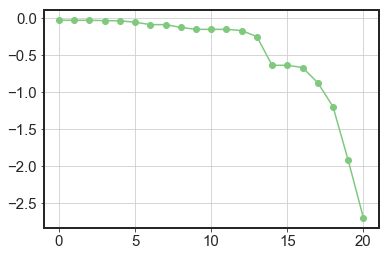

In [36]:
a=np.log(np.cumsum(np.exp(-lowest_chi_squared)))
plt.plot(range(len(a)-1),-a[1:],marker='o')
plt.grid()

In [25]:
print(np.log(np.sum(np.exp(-lowest_chi_squared))))

2.7062817157936934


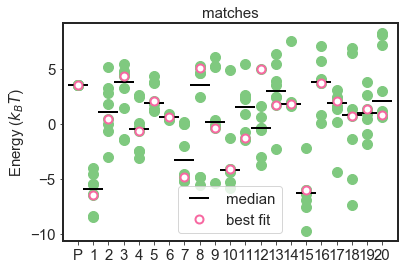

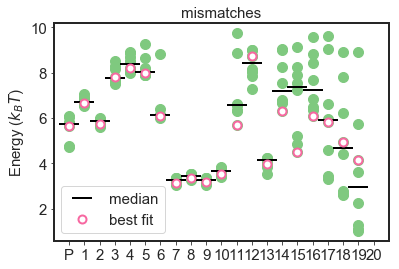

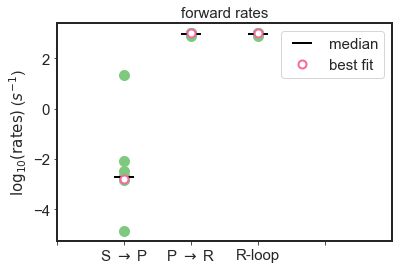

In [64]:
# ---- show fluctuations in parameter sets --- 
# THIS IS THE RESULT

# --- Matches ---
# MAYBE WE WANT TO NEGATE (multiply by -1 all the epsilonC to have the same sign convention as EpsilonPAM and EpsilonI)
plt.figure()
for sim in simset3:
    matches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

matches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    

matches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('matches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);

# --- Mismatches --- 
plt.figure()
for sim in simset3:
    mismatches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

mismatches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    

mismatches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('mismatches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);


# --- 10log of the forward rates --- 
plt.figure()
for sim in simset3:
    forward_rates.loc[sim].apply(np.log10).plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

forward_rates.median().apply(np.log10).plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    
    

forward_rates.loc[best_fit_conc3].apply(np.log10).plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('forward rates',fontsize=15)
plt.xticks(range(-1,4),['',r'S $\rightarrow$ P',r'P $\rightarrow$ R','R-loop',''],fontsize=15);
plt.xlim(-1,4);
plt.yticks(fontsize=15);
plt.ylabel(r'$\log_{10}(\rm{rates})$ ($s^{-1}$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);




In [24]:
forward_rates['PAM_to_R1'].mean()

946.1701015013684

In [25]:
forward_rates.loc[best_fit_conc3]

sol_to_PAM      0.001543
PAM_to_R1     992.435073
internal      992.435073
Name: ../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_6.txt, dtype: float64

In [62]:
matches.loc[best_fit_conc3]

PAM    3.500000
1     -6.471187
2      0.381443
3      4.351149
4     -0.700249
5      2.012393
6      0.571043
7     -4.828597
8      5.019860
9     -0.350366
10    -4.078553
11    -1.307741
12     4.912711
13     1.710544
14     1.780524
15    -6.026723
16     3.657865
17     2.060678
18     0.718515
19     1.349741
20     0.831253
Name: ../Diewertje/27_5_2019_cas12_conc3_WA/fit_27_5_2019_cas12_conc3_WA_sim_6.txt, dtype: float64

In [63]:
epsPAM=[]
ontarget_ABA=[]

for sim in simset3:
    concentrations=np.array([0.1,0.3,1,3,10,30,100,300])
    Param=getParm.load_simm_anneal(sim,Nparams)
    epsPAM.append(Param[0])
    ontarget_ABA.append(CalcABA.calc_ABA(Param, concentrations, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10))
print(epsPAM)
print(ontarget_ABA)

[4.1961398283, 9.97818216555, 9.51261731, 5.38453066072, 4.93929946793, 3.43711074631, 4.86601877412, 4.61205597812]
[-0.5141876736517527, 4.994762560035956, 4.587395023843671, 0.40723161188355234, 0.030807444017204866, -0.9720583125647597, -0.02861901647902289, -0.23383525162023697]


# Plot block mm with weighted average

In [39]:
def plot_single_mut_ABA(data, Mut_type, data_name='Finkelstein Data', Canonical=True, Plot=True):

    Mut_names = {'r':'Mismatch', 'i':'Insertion', 'd': 'Deletion'}
    Mut_name = Mut_names[Mut_type]
    
    data['Mutation Type'].fillna('', inplace=True)
    single_mut_data = data[(data['Canonical']==Canonical)&(data['Mutation Type']==Mut_type)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    single_mut_data['Position'] = single_mut_data['Mutation ID'].apply(lambda x: int(x.split(':')[1]))
    single_mut_data_mean = single_mut_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()
    
    if Plot:
        single_mut_data_mean.plot(x='Position', y='Delta ABA (kBT)',yerr='Uncertainty', marker='o', linewidth=1, color='blue') 
        plt.xlabel(Mut_name+' postion', fontsize=15)
        plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
        if not Canonical:
            plt.title(data_name + ' - Noncanonical',fontsize=15)
    
    return single_mut_data_mean

def plot_double_mut_ABA(data, Mut_type, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    Mut_names = {'r':'Mismatch', 'i':'Insertion', 'd': 'Deletion'}
    Mut_name = Mut_names[Mut_type]
    Mut_type_str = Mut_type+'|'+Mut_type
    
    data['Mutation Type'].fillna('', inplace=True)
    double_mut_data = data[(data['Canonical']==Canonical)&(data['Mutation Type']==Mut_type_str)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    double_mut_data['Position'] = double_mut_data['Mutation ID'].apply(lambda x: '|'.join(map(lambda y: y.split(':')[1], x.split('|'))))
    double_mut_data_mean = double_mut_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()

    Ng = 20;
    double_mut_map = np.empty((Ng,Ng))
    double_mut_map[:] = np.nan
    for n in range(len(double_mut_data_mean)):
        pos = double_mut_data_mean['Position'].iloc[n]
        Positions = list(map(lambda x: int(x)-1, pos.split('|')))
        double_mut_map[Positions[1],Positions[0]] = double_mut_data_mean['Delta ABA (kBT)'].iloc[n]
        
    if Plot:    
        plt.figure()
        sns.heatmap(double_mut_map, cmap='coolwarm',cbar=True,vmin=0,vmax=double_mut_data_mean['Delta ABA (kBT)'].max())
        plt.xlabel(Mut_name+' 1', fontsize=15)
        plt.ylabel(Mut_name+' 2', fontsize=15)
        plt.title('$\Delta$ABA - '+data_name,fontsize=15)
        if not Canonical:
            plt.title('$\Delta$ABA - '+data_name+' - Noncanonical',fontsize=15)
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)),ax.get_xticks()+0.5)));
        ax.set_yticklabels(list(map(lambda x: str(int(x)),ax.get_yticks()+0.5)));
    
    return double_mut_data_mean, double_mut_map

def make_block_ID(MM_pos_list):
    
    bi = MM_pos_list[0]
    bf = MM_pos_list[-1]
    block = np.arange(bi,bf+1)
    if (len(block)!=len(MM_pos_list)) or np.any(block!=np.array(MM_pos_list)):
        return ''
    return '|'.join(list(map(str, [bi, bf])))

def plot_block_mm_ABA(data, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    block_mm_data_mean = multi_mm_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()

    Ng = 20;
    block_mm_map = np.empty((Ng,Ng))
    block_mm_map[:] = np.nan
    for n in range(len(block_mm_data_mean)):
        pos = block_mm_data_mean['Position'].iloc[n]
        Positions = list(map(lambda x: int(x)-1, pos.split('|')))
        block_mm_map[Positions[0],Positions[1]] = block_mm_data_mean['Delta ABA (kBT)'].iloc[n]

    if Plot:
        plt.figure()
        sns.heatmap(block_mm_map, cmap='coolwarm',cbar=True,vmin=2,vmax=5) #=block_mm_data_mean['Delta ABA (kBT)'].max())
        #plt.xlabel('Block end', fontsize=15)
        #plt.ylabel('Block start', fontsize=15)
        plt.title('$\Delta$ABA - '+data_name,fontsize=15)
        if not Canonical:
            plt.title('$\Delta$ABA - '+data_name+' - Noncanonical',fontsize=15)
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)),ax.get_xticks()+0.5)));
        ax.set_yticklabels(list(map(lambda x: str(int(x)),ax.get_yticks()+0.5)));
    
    block_start_mm_data = block_mm_data_mean.set_index('Position').groupby(lambda x: int(x.split('|')[0])).mean().reset_index().rename(columns={'index':'Block start'})
    
    if Plot:
        block_start_mm_data.plot(x='Block start', y='Delta ABA (kBT)',yerr='Uncertainty', marker='o', linewidth=1, color='blue') 
        #plt.xlabel('Block start', fontsize=15)
        #plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
        if not Canonical:
            plt.title(data_name+' - Noncanonical',fontsize=15)
    
    return block_mm_data_mean, block_mm_map, block_start_mm_data

def plot_block_mm_ABA_WA(data, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    block_mm_data_mean = multi_mm_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position')
    ydata=[]
    yerr=[]
    pos=[]
    for blockID, group in block_mm_data_mean:
        yvals=[]
        yerval=[]
        for i in range(len(group)):
            yvals.append(group['Delta ABA (kBT)'].iloc[i])
            yerval.append(group['Uncertainty'].iloc[i])
        pos.append(group['Position'].iloc[i])
        ydata.append(yvals)
        yerr.append(yerval)

    wa=[]
    for i in range(len(pos)):
        y = np.array(ydata[i])
        e = np.array(yerr[i])
        wa.append(np.average(y, weights=e ** -2, axis=0))

    block_mm_data_mean=pd.DataFrame({'Position':pd.Series(pos),'Delta ABA (kBT)':pd.Series(wa)})
    
    Ng = 20;
    block_mm_map = np.empty((Ng,Ng))
    block_mm_map[:] = np.nan
#     for n in range(len(ydata)):
#         pos = pos[n]
#         Positions = list(map(lambda x: int(x)-1, pos.split('|')))
#         block_mm_map[Positions[0],Positions[1]] = wa[n]

#     if Plot:
#         plt.figure()
#         sns.heatmap(block_mm_map, cmap='coolwarm',cbar=True,vmin=2,vmax=5) #=block_mm_data_mean['Delta ABA (kBT)'].max())
#         #plt.xlabel('Block end', fontsize=15)
#         #plt.ylabel('Block start', fontsize=15)
#         plt.title('$\Delta$ABA - '+data_name,fontsize=15)
#         if not Canonical:
#             plt.title('$\Delta$ABA - '+data_name+' - Noncanonical',fontsize=15)
#         ax = plt.gca()
#         ax.set_xticklabels(list(map(lambda x: str(int(x)),ax.get_xticks()+0.5)));
#         ax.set_yticklabels(list(map(lambda x: str(int(x)),ax.get_yticks()+0.5)));
    
    block_start_mm_data = pd.DataFrame(block_mm_data_mean).set_index('Position').groupby(lambda x: int(x.split('|')[0])).mean().reset_index().rename(columns={'index':'Block start'})
    if Plot:
        block_start_mm_data.plot(x='Block start', y='Delta ABA (kBT)', marker='o', linewidth=1, color='blue') 
        #plt.xlabel('Block start', fontsize=15)
        #plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
        if not Canonical:
            plt.title(data_name+' - Noncanonical',fontsize=15)
    
    return block_mm_data_mean, block_mm_map, block_start_mm_data

def plot_mut_PAM_ABA(data, data_name='Finkelstein Data', Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    data['Alignment'].fillna('', inplace=True)
    NonCanonical = data[(data['Canonical']==False)&(data['Alignment']!='')&(data['Mutation Type']=='')][['PAM', 'Delta ABA (kBT)', 'Uncertainty']].groupby('PAM').mean()
    
    if Plot:
        bar_width = 0.35
        plt.figure(figsize=(20,6))
        plt.bar(np.arange(len(NonCanonical)), NonCanonical['Delta ABA (kBT)'], width=bar_width)
        ax = plt.gca()
        ax.set_xticks(np.arange(len(NonCanonical))+0.5*bar_width);
        ax.set_xticklabels(NonCanonical.index, rotation='vertical');
        #plt.xlabel('PAM', fontsize=15)
        #plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
    
    return NonCanonical

20


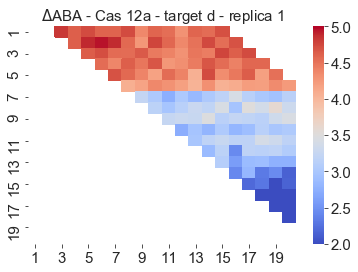

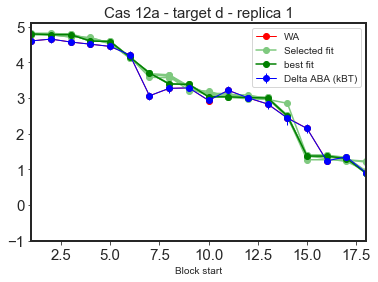

In [49]:
ontarget_ABA_best = CalcABA.calc_ABA(Param_conc3, concentrations, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
    
energy_block=[]
epsilon = Param_conc3[:-2]
for mmStart in range(1,21):
    block=np.arange(mmStart,21)
    energies=ABA.get_energies(epsilon,block, guide_length)
    energy_block.append(-np.log(np.sum(np.exp(-np.cumsum(energies))))-ontarget_ABA_best)
print(len(energy_block))   

#plt.xlabel('Start mismatch block')

Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename_3 = 'cas12a-target-d-replicate-1-delta-abas-processed.csv'
data_cas12a_d1 = pd.read_csv(Path+filename_3)
_, block_cas12a_d, block_start_cas12_d2 = plot_block_mm_ABA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=True)
_, block_cas12a_d_WA, block_start_cas12_d2_WA = plot_block_mm_ABA_WA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=False)
plt.plot(block_start_cas12_d2_WA['Block start'], block_start_cas12_d2_WA['Delta ABA (kBT)'], marker='o', linewidth=1, color='red',label='WA') 

epsPAM=[]
rates=[]
# Also plot all the selected fits
for sim in selected_sims_chi:
    concentrations=np.array([1,30,100])
    Param=getParm.load_simm_anneal(sim,Nparams)
    epsPAM.append(Param[0])
    rates.append([Param[-2],Param[-1]])
    ontarget_ABA_sim = CalcABA.calc_ABA(Param, concentrations, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
    energy_block=[]
    epsilon = Param[:-2]
    for mmStart in range(1,21):
        block=np.arange(mmStart,21)
        energies=ABA.get_energies(epsilon,block, guide_length)
        energy_block.append(-np.log(np.sum(np.exp(-np.cumsum(energies))))-ontarget_ABA_sim)
    
    plt.plot(range(1,21),energy_block,marker='o',color=sns.color_palette()[0])

plt.plot(range(1,21),energy_block,marker='o',color=sns.color_palette()[0],label='Selected fit')
plt.plot(range(1,21),energy_block,marker='o',label='best fit',color='green')

plt.legend()

In [58]:
diffPAM=[]
diffOT=[]
diffrates=[]
for i in range(len(epsPAM)-1):
    diffPAM.append(abs(epsPAM[i+1]-epsPAM[i]))
    diffOT.append(abs(ontarget_ABA[i+1]-ontarget_ABA[i]))
    diffrates.append(abs(rates[i+1][0]-rates[i][0]))
print(diffPAM)
print(diffOT)
print(diffrates)

[5.782042337250001, 0.46556485555000116, 4.128086649279999, 0.44523119279000056, 1.5021887216199996, 1.4289080278099995, 0.2539627959999997]
[5.767171442837062, 0.4483294817210153, 4.163646244060158, 0.421589687483089, 1.49445355184338, 1.4278123745925544, 0.2647614351817881]
[0.5925134590099996, 2.76389569509, 6.20225903125, 4.15242917601, 0.3362471119800001, 0.3480816259499999, 0.10411187391999999]


In [50]:
rates

[[-2.68999151271, 2.98039640451],
 [-2.0974780537, 2.97114100373],
 [-4.86137374879, 2.99029579553],
 [1.34088528246, 2.97403496888],
 [-2.81154389355, 2.99670210388],
 [-2.47529678157, 2.99459978315],
 [-2.82337840752, 2.89703843128],
 [-2.7192665336, 2.99515708519]]

# Compare parameters best fits delta and abs Cas12

In [25]:
matches2, mismatches2, rates2, landscape2, free_energy2, fast_Rloop2 = SAfits.process_SA_fits(['../Diewertje/19_5_2019_cas12_conc3/fit_19_5_2019_cas12_conc3_sim_18.txt'],44,'general_energies_no_kPR')


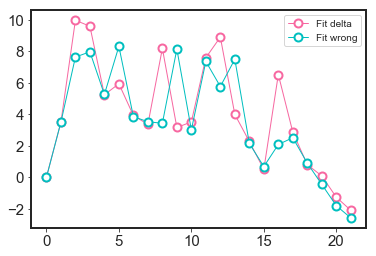

In [26]:
plt.plot(np.array(np.array(lowest_chi_squared)), color='#f768a1' , 
         marker='o', 
         lw=1,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='Fit delta');
plt.plot(np.array(landscape2)[0], color='c' , 
         marker='o', 
         lw=1,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='Fit wrong');
plt.legend()

In [27]:
Param_first=getParm.load_simm_anneal('../Diewertje/19_5_2019_cas12_conc3/fit_19_5_2019_cas12_conc3_sim_18.txt',Nparams)


In [28]:
np.array(Param_conc3)-np.array(Param_first)

array([ 1.62255293e-01, -2.33798852e+00,  7.15069478e-01,  1.64378343e+00,
        2.35254994e+00, -2.44842171e+00,  2.47498197e-01, -4.92762532e+00,
        9.73158584e+00, -5.47958910e+00,  2.67440511e-01, -2.90155440e+00,
        6.64472331e+00, -3.63531728e+00,  3.10061237e-01, -4.62211037e+00,
        4.08656756e+00,  4.45826775e-01, -6.29807507e-01, -2.24758306e-03,
        5.58364550e-02, -7.90831495e-01, -6.29355324e-01, -5.56884996e-01,
       -1.26136873e+00, -2.59669861e-01, -6.00556129e-01, -3.38206009e-01,
       -5.00851537e-01, -4.23829989e-01, -5.06245568e-01, -5.10281402e-01,
       -7.69471477e-01,  1.26728955e+00, -5.03317435e-01,  1.71209159e+00,
       -5.56936895e-01, -2.40850507e+00,  9.62279277e-01, -4.24476549e+00,
        1.76782433e+00,  1.11898340e-01,  4.30047430e-02])

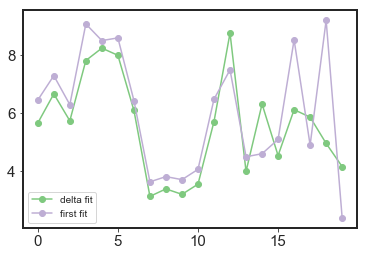

In [29]:
epsI=Param_conc3[21:41]
epsIfirst=Param_first[21:41]
plt.plot(range(len(epsI)),epsI,marker='o',label='delta fit')
plt.plot(range(len(epsI)),epsIfirst,marker='o',label='first fit')
plt.legend()

In [30]:
rates=10**np.array(Param_conc3[-2:])
rates_first=10**np.array(Param_first[-2:])
print(rates)
print(rates_first)

[1.54332043e-03 9.92435073e+02]
[1.19277291e-03 8.98870983e+02]


# Compare best fit and fit with ontarget value 5 (sim2)

In [45]:
Param2=getParm.load_simm_anneal(sim2,Nparams)
Param4=getParm.load_simm_anneal(sim4,Nparams)
#Param=getParm.load_simm_anneal(best_fit_conc3,Nparams)

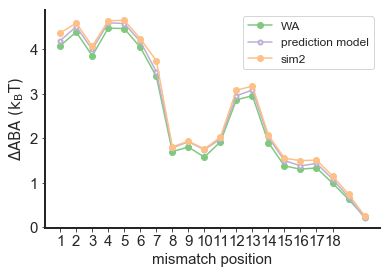

In [46]:
plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA')
#_ = pltABA.predict_single_mm(param_play,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
_ = pltABA.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
plot2 = pltABA.predict_single_mm(Param2,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)
#plot7 = pltABA.predict_single_mm(Param7,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)
#plotfirst = pltABA.predict_single_mm(Param_first,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)
plt.plot(range(1,21),plot2,marker='o',label='sim2')
#plt.plot(range(1,21),plot7,marker='o',label='sim7')
#plt.plot(range(1,21),plotfirst,marker='o',label='fit wrong code')
plt.legend(prop={'size':12})

In [77]:
print(Param2[-2:])
print(Param_conc3[-2:]) # sim6
print('epsilon pam:',Param2[0])
print('epsilon pam:',Param_conc3[0])

[-2.0974780537, 2.97114100373]
[-2.81154389355, 2.99670210388]
epsilon pam: 9.97818216555
epsilon pam: 4.93929946793


In [75]:
ontarget_ABA

[-0.5842791666714473,
 5.1828922761656155,
 4.7345627944446,
 -0.14212192953042027,
 0.5709165503844428,
 0.14932686290135375,
 0.5751864997733567,
 -0.5763278788664473,
 -1.3451266889420261,
 5.1713834751222]

In [29]:
def predict_double_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    #concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    concentrations=np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_delta_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T,
                                                                                ontarget_ABA=ontarget_ABA)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=0.5, vmax=5.5)
        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction (top)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='ABA', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

import seaborn as sns
plt.figure()
best_heatmap = predict_double_mm(Param2,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=True, vmin=0.5,vmax=5.5)
plt.title('Prediction (top) / WA (bottom)')

NameError: name 'Param2' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
def predict_single_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    #concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    concentrations=np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA = np.zeros(guide_length)
    for mm_pos in range(1, guide_length + 1):
        delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                       mismatch_positions=[mm_pos],
                                                       model_id=model_id,
                                                       guide_length=guide_length,
                                                       T=T,
                                                       ontarget_ABA=ontarget_ABA)

    if show_plot:
        ax = plt.plot(range(1, guide_length + 1),
                      delta_ABA,
                      marker='o',
                      markersize=4,
                      markerfacecolor='white',
                      markeredgewidth=2,
                      linestyle='solid',
                      label='prediction model')

        sns.despine()
        plt.xticks(range(1, 19), fontsize=15);
        plt.yticks(fontsize=15);
        plt.xlabel('mismatch position', fontsize=15);
        plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            single_mut_data_mean = plot_single_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)

            plt.errorbar(x=single_mut_data_mean['Position'],
                         y=single_mut_data_mean['Delta ABA (kBT)'],
                         yerr=single_mut_data_mean['Uncertainty'],
                         marker='o',
                         markersize=4,
                         markerfacecolor='white',
                         markeredgewidth=2,
                         linestyle='solid',
                         label='data Finkelstein lab')
            plt.legend(fontsize=15, loc='best')
    return delta_ABA

plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA')
_ = predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
plot2 = predict_single_mm(Param2,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)
plt.plot(range(1,21),plot2,marker='o',label='sim2')
plt.legend(prop={'size':12})

In [48]:
concentrations=np.array([1,30,100])

Chi_square_best=[]
Chi_square_best2=[]
ontarget_ABA = CalcABA.calc_ABA(Param_conc3, concentrations, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
for i in range(len(ydata)):
    mABA=ABA.calc_delta_ABA(Param_conc3, concentrations, reference_conc, xdata[i],ontarget_ABA, model_id =model_id, guide_length = guide_length, T=10*60)
    Chi_square_best.append(sum((((mABA*np.ones(len(ydata[i])))-np.array(ydata[i]))/np.array(yerr[i]))**2))
    Chi_square_best2.append(sum((((np.array(ydata[i]-mABA)))/np.array(yerr[i]))**2))

Chi_square_sim2=[]
ontarget_ABA = CalcABA.calc_ABA(Param2, concentrations, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
for i in range(len(ydata)):
    mABA=ABA.calc_delta_ABA(Param2, concentrations, reference_conc, xdata[i],ontarget_ABA, model_id =model_id, guide_length = guide_length, T=10*60)
    Chi_square_sim2.append(sum((((mABA*np.ones(len(ydata[i])))-np.array(ydata[i]))/np.array(yerr[i]))**2))

In [49]:
#concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
concentrations = np.array([1,30,100])
reference_conc = 1 #10
right=0
wrong=0
for i in range(len(xdata)):
    ontarget_ABA = CalcABA.calc_ABA(Param2, concentrations, reference=1,
                                        mismatch_positions=[],
                                        model_id=model_id,
                                        guide_length=20,
                                        T=60 * 10)
    ABA51_eye=ABA.calc_delta_ABA(Param2, concentrations, reference_conc, xdata[i],ontarget_ABA, model_id =model_id, guide_length = guide_length, T=10*60)

    ontarget_ABA = CalcABA.calc_ABA(Param_conc3, concentrations, reference=1,
                                        mismatch_positions=[],
                                        model_id=model_id,
                                        guide_length=20,
                                        T=60 * 10)
    ABA51_best=ABA.calc_delta_ABA(Param_conc3, concentrations, reference_conc, xdata[i],ontarget_ABA, model_id =model_id, guide_length = guide_length, T=10*60)
    #print('Eye fit has ABA:',ABA51_eye,'with chi-squared=',Chi_square_sim5[ind[i]])
    #print('best fit has ABA:',ABA51_best,'with chi-squared=',Chi_square_best[ind[i]])
    #print('WA has ABA:',WA['WA_data_delta'][ind[i]],'chi-squared=',Chi_square_WA[ind[i]])
    if(((abs(ABA51_eye-WA['WA_data_delta'][i]))>(abs(ABA51_best-WA['WA_data_delta'][i])))&(Chi_square_sim2[i]>Chi_square_best[i])):
        #print('Right!')
        right+=1
    else: 
        if(((abs(ABA51_eye-WA['WA_data_delta'][i]))<(abs(ABA51_best-WA['WA_data_delta'][i])))&(Chi_square_sim2[i]<Chi_square_best[i])):
            #print('Right!')
            right+=1
        else:
            #print('Wrong')
            wrong+=1
    #print('    ')
print('right=',right)
print('wrong=',wrong)

right= 210
wrong= 0


In [50]:
Chi_square_WA=[]
for i in range(len(ydata)):
    Chi_square_WA.append(sum(((np.array(WA['WA_data_delta'][i])-np.array(ydata[i]))/np.array(yerr[i]))**2))
   

print('The chi-squared of the best fit is:',chi_squared[0])
print('The chi-squared of the 2th fit is:',chi_squared[1])
#print('The chi-squared of the 7th fit is:',chi_squared[6])
print('The chi-squared of the WA is: ',sum(Chi_square_WA))

# logically that it is much lower, since chi-squared of the fits is compared to WA, the 
# chi-squared WA if compared to data


The chi-squared of the best fit is: 2975.52893341
The chi-squared of the 2th fit is: 2603.88767228
The chi-squared of the WA is:  45322.572884827445


In [22]:
score,corr,prediction=predict_train(Param_conc3,
                                    model_id='general_energies_no_kPR',
                                    path=path,replica=replica,Plot=True)
prediction
parts=[]
for i in range(len(ydata)):
    parts.append(sum((np.array(ydata[i])-(prediction['WA_data'][i]*np.ones(len(ydata[i]))))**2/(np.array(yerr[i])**2)))
    
chi_squared_WA=sum(np.array(parts))
chi_squared_WA

45322.572884827445

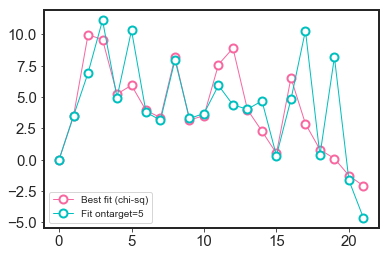

In [51]:
_,_,_,landscape2,_,_ = SAfits.process_SA_fits(['../Diewertje/19_5_2019_cas12_conc3/fit_19_5_2019_cas12_conc3_sim_2.txt'],44,'general_energies_no_kPR')
_,_,_,landscape7,_,_ = SAfits.process_SA_fits(['../Diewertje/19_5_2019_cas12_conc3/fit_19_5_2019_cas12_conc3_sim_7.txt'],44,'general_energies_no_kPR')

plt.plot(np.array(np.array(lowest_chi_squared)), color='#f768a1' , 
         marker='o', 
         lw=1,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='Best fit (chi-sq)');
plt.plot(np.array(landscape2)[0], color='c' , 
         marker='o', 
         lw=1,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='Fit ontarget=5');
# plt.plot(np.array(landscape4)[0], color='g' , 
#          marker='o', 
#          lw=1,
#          markersize =8,
#          markerfacecolor='white',
#          markeredgewidth= 2,
#          label='Sim 4');
# plt.plot(np.array(landscape7)[0], color='b' , 
#          marker='o', 
#          lw=1,
#          markersize =8,
#          markerfacecolor='white',
#          markeredgewidth= 2,
#          label='Sim 7');
plt.legend(prop={'size':10})

# See if equilibrium holds

In [9]:
ABAnorm=[]
ABAeq=[]
epsilon=Param_conc3[:-2]
concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5

for i in range(len(xdata)):
    ABAnorm.append(CalcABA.calc_ABA(Param_conc3,concentrations,1,xdata[i],model_id))
    energies=CalcABA.get_energies(epsilon,xdata[i], guide_length=20)
    ABAeq.append(-np.log(np.sum(np.exp(-np.cumsum(energies)))))
    

In [10]:
def predict_block_mismatches_eq(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                             data_file = '../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    delta_ABA_mat[:] = np.nan

    for start_of_block in range(1, guide_length + 1):
        for end_of_block in range(start_of_block + 2, guide_length + 1):
            mm_block = list(range(start_of_block, end_of_block)) # Python 3! for python 2, remove the list around it!
            energies_simple=CalcABA.get_energies(epsilon,mm_block, guide_length)
            delta_ABA_mat[start_of_block - 1, end_of_block - 1] = -np.log(np.sum(np.exp(-np.cumsum(energies_simple))))
            

    return delta_ABA_mat

def predict_block_mismatches_normal(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                             data_file = '../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    delta_ABA_mat = np.zeros((guide_length, guide_length))
    delta_ABA_mat[:] = np.nan

    for start_of_block in range(1, guide_length + 1):
        for end_of_block in range(start_of_block + 2, guide_length + 1):
            mm_block = list(range(start_of_block, end_of_block)) # Python 3! for python 2, remove the list around it!
            delta_ABA_mat[start_of_block - 1, end_of_block - 1] = CalcABA.calc_ABA(parameters, concentrations,
                                                                                         reference_conc,
                                                                                         mismatch_positions=mm_block,
                                                                                         model_id=model_id,
                                                                                         guide_length=guide_length,
                                                                                         T=T)

    return delta_ABA_mat

blocks_eq = predict_block_mismatches_eq(Param_conc3, model_id=model_id, 
                                               T=60*10,guide_length=20,show_plot=False)




blocks_normal = predict_block_mismatches_normal(Param_conc3, model_id=model_id, 
                                               T=60*10,guide_length=20,show_plot=False)


In [11]:
normal=ABAnorm+blocks_normal.tolist()
eq=ABAeq+blocks_eq.tolist()
C = np.corrcoef(blocks_normal,blocks_eq)[1,0]
#plt.title('correlation coefficient: ' + str(C) , fontsize=20);
C

nan

In [12]:
diff=[]
for i in range(len(xdata)):
    if(len(xdata[i])==1): 
        diff.append(abs(np.array(ABAnorm[i])-np.array(ABAeq[i])))
diff
        

[0.25709060494121294,
 0.030152896906790794,
 0.011628618311918526,
 7.85095721766993e-09,
 1.8139714619280767e-08,
 0.0004126810901210476,
 0.0069728698909443665,
 0.011886674913302198,
 0.009371817828348616,
 0.03886935913077827,
 0.1468572284746732,
 0.07534940819263714,
 0.5905120542416699,
 0.014680297215940108,
 0.005853372344706287,
 0.003633498507391586,
 0.0031911548004242007,
 0.009343843372401572,
 0.03070359965929792,
 0.022202989100054804]

-1.1978629362406041
ontarget ABA is: 0.030807444017204866
[4.19762488 4.51358768 4.00002884 4.60021333 4.58257519 4.18042828
 3.50078206 1.78420267 1.92570927 1.74534099 1.98648306 2.95884287
 3.08767754 2.01967387 1.49965574 1.38252248 1.43534838 1.08484015
 0.67955485 0.21010875]


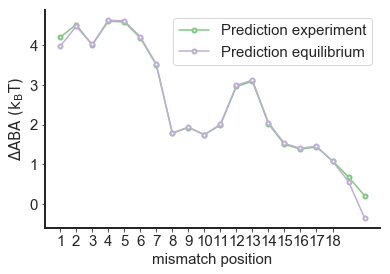

In [17]:
ABA_simple=[]
epsilon = Param_conc3[:-2]
for mm_pos in range(1, guide_length + 1):
    energies_simple=CalcABA.get_energies(epsilon,[mm_pos], guide_length)
    ABA_simple.append(-np.log(np.sum(np.exp(-np.cumsum(energies_simple)))))
ABA_simple

ABA_simple_on=-np.log(np.sum(np.exp(-np.cumsum(CalcABA.get_energies(epsilon,[],guide_length)))))
print(ABA_simple_on)
ABA_simple_delta=ABA_simple-ABA_simple_on
ABA_simple_delta

normalSingle = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)

plt.plot(range(1,21),normalSingle,marker='o',markersize=4,markerfacecolor='white',markeredgewidth=2,linestyle='solid',label='Prediction experiment')
plt.plot(range(1,21),np.array(ABA_simple),marker='o',markersize=4,markerfacecolor='white',markeredgewidth=2,linestyle='solid',label='Prediction equilibrium')
plt.xticks(range(1, 19), fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('mismatch position', fontsize=15);
plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)
plt.legend(fontsize=15, loc='best')
sns.despine()

# now plotted experiment delta value and equilibrium abs value ABA

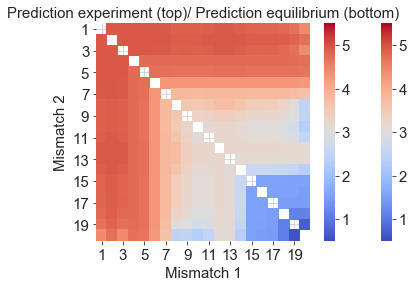

In [18]:
def predict_double_mm_normal(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=0.5, vmax=5.5)
        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction experiment (top)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='Delta ABA (kBT)', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=1, vmax=6)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat, str_title

def predict_double_mm_eq(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv',
                      str_title='..'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            energies_simple=CalcABA.get_energies(epsilon,[first_mm,second_mm], guide_length)
            delta_ABA_mat[first_mm - 1, second_mm - 1] = -np.log(np.sum(np.exp(-np.cumsum(energies_simple))))
    
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.triu(delta_ABA_mat),vmin=0.5, vmax=5.5)
        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title += '/ Prediction equilibrium (bottom)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='Delta ABA (kBT)', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=1, vmax=6)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

_,str_title = predict_double_mm_normal(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
normdoublemm = predict_double_mm_eq(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA,str_title=str_title)


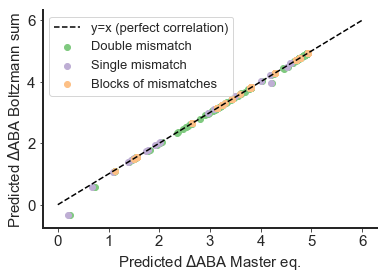

In [28]:
plt.scatter(ABAnorm,ABAeq,label='Double mismatch')
plt.scatter(normalSingle,ABA_simple,label='Single mismatch')
plt.scatter(blocks_normal,blocks_eq,label='Blocks of mismatches')
#+2.5545002878227865
x = np.linspace(0,6,1000);
plt.plot(x,x, linestyle='dashed', color='black', label='y=x (perfect correlation)')
plt.legend(fontsize=13, frameon=True, loc='upper left')
plt.xlabel('Predicted $\Delta$ABA Master eq.',fontsize=15);
plt.ylabel('Predicted $\Delta$ABA Boltzmann sum',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
sns.despine();



In [121]:
Param5=getParm.load_simm_anneal(sim5,Nparams)
Param7=getParm.load_simm_anneal(sim7,Nparams)

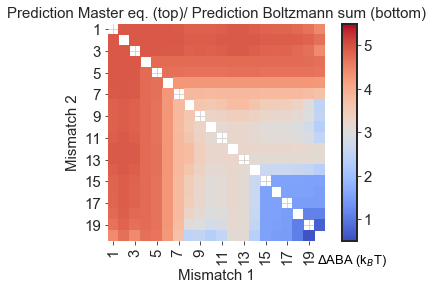

In [40]:
def predict_double_mm_normal(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=0.5, vmax=5.5, square=True, cbar=False)
        cbar = axHeatmap.figure.colorbar(axHeatmap.axes.collections[0],aspect=15,drawedges=False);
        cbar.set_label(r'$\Delta$ABA (k$_B$T)',rotation=0, labelpad=-20,fontsize=13,y=-0.05,color='black')
        #cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontsize=10);

        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction Master eq. (top)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='Delta ABA (kBT)', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat, str_title

def predict_double_mm_eq(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv',
                      str_title='..'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            energies_simple=CalcABA.get_energies(epsilon,[first_mm,second_mm], guide_length)
            delta_ABA_mat[first_mm - 1, second_mm - 1] = -np.log(np.sum(np.exp(-np.cumsum(energies_simple))))
    
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.triu(delta_ABA_mat),vmin=0.5, vmax=5.5,square=True,cbar=False)
        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title += '/ Prediction Boltzmann sum (bottom)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='Delta ABA (kBT)', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

z,str_title = predict_double_mm_normal(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
normdoublemm = predict_double_mm_eq(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA,str_title=str_title)
ax = plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), ax.get_yticks() + 0.5)), fontsize=15, rotation=0);




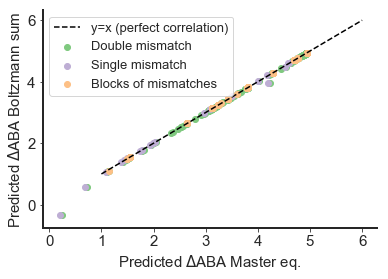

In [27]:
plt.scatter(ABAnorm,ABAeq,label='Double mismatch')
plt.scatter(normalSingle,ABA_simple,label='Single mismatch')
plt.scatter(blocks_normal,blocks_eq,label='Blocks of mismatches')
#+2.5545002878227865   OR +1.2599085983218907
x = np.linspace(1,6,1000);
plt.plot(x,x, linestyle='dashed', color='black', label='y=x (perfect correlation)')
plt.legend(fontsize=13, frameon=True, loc='upper left')
plt.xlabel('Predicted $\Delta$ABA Master eq.',fontsize=15);
plt.ylabel('Predicted $\Delta$ABA Boltzmann sum',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
sns.despine();

